In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
OUTPUT_DIR = '../model_outputs/'
SAVE_DIR = '../figures/'

In [4]:
csv_list =[]
for i in os.listdir(OUTPUT_DIR):
    csv_list.append(OUTPUT_DIR+i+'/log.csv')

In [5]:
csv_list

['../model_outputs/UNET_with_augmentation/log.csv']

# UNET

In [ ]:
# UNET_BASE = pd.read_csv(csv_list[1])
UNET_BASE = pd.read_csv(csv_list[1])

In [7]:
def rename(df):
    df.rename(columns={'dice':'train_dice','iou':'train_iou','loss':'train_loss'},inplace=True)
    return df

In [8]:
UNET_BASE= rename(UNET_BASE)

In [17]:
# def plot_loss(df,title):
#     plt.plot(df.epoch,df.train_loss,marker='o',color='r')
#     plt.plot(df.epoch,df.val_loss,marker='+',color='b')
#     plt.title(title, fontsize=13) 
#     plt.legend(fontsize=12)
#     plt.savefig(SAVE_DIR+title+'.png',dpi=300)
#     plt.show()
def plot_loss(df, title):
    plt.plot(df.epoch, df.train_loss, marker='o', color='r', label='Train Loss')  # Added label
    plt.plot(df.epoch, df.val_loss, marker='+', color='b', label='Val Loss')  # Added label
    plt.title(title, fontsize=13)
    plt.ylabel('Loss', fontsize=14)  # Added y-axis label for clarity
    plt.xlabel('Epochs', fontsize=14)  # Added x-axis label for clarity
    plt.legend(fontsize=12, loc='best')  # Ensures the legend is displayed
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()


In [11]:
# def plot_metric(df,title,iou=True):
#     if iou == True:
#         plt.plot(df.epoch,df.train_dice,marker='x',color='r')
#         plt.plot(df.epoch,df.val_dice,marker='+',color='orangered')
#     else:
#         plt.plot(df.epoch,df.train_iou,marker='o',color='navy')
#         plt.plot(df.epoch,df.val_iou,marker='+',color='royalblue')
#     plt.title(title, fontsize=13) 
#     plt.ylabel('Score', fontsize=14)
#     plt.xlabel('Epochs', fontsize=14)
#     plt.legend(fontsize=12, loc='best')
#     plt.savefig(SAVE_DIR+title+'.png',dpi=300)
#     plt.show()

def plot_metric(df, title, iou=True):
    if iou:
        plt.plot(df.epoch, df.train_dice, marker='x', color='r', label='Train Dice')
        plt.plot(df.epoch, df.val_dice, marker='+', color='orangered', label='Val Dice')
    else:
        plt.plot(df.epoch, df.train_iou, marker='o', color='navy', label='Train IoU')
        plt.plot(df.epoch, df.val_iou, marker='+', color='royalblue', label='Val IoU')
    plt.title(title, fontsize=13)
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.legend(fontsize=12, loc='best')  # Ensure legend is called after defining labels
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()

    

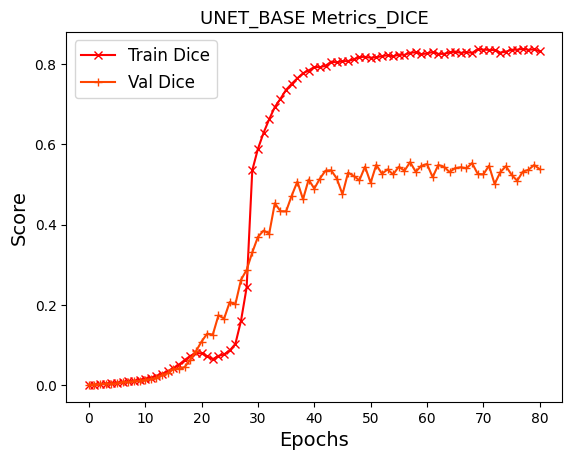

In [12]:
plot_metric(UNET_BASE,'UNET_BASE Metrics_DICE')

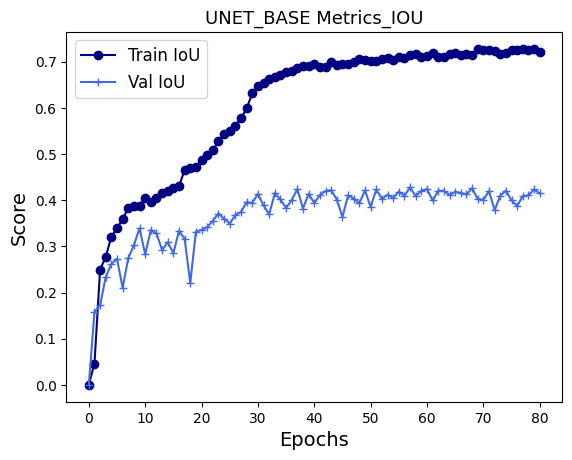

In [13]:
plot_metric(UNET_BASE,'UNET_BASE Metrics_IOU',False)

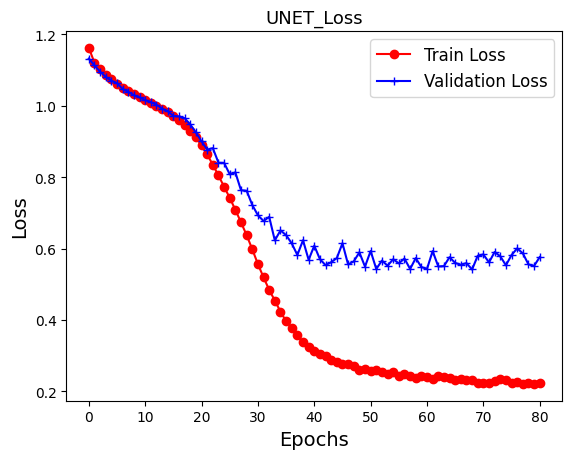

In [16]:
plot_loss(UNET_BASE,'UNET_Loss')

# UNET_AUGMENTATION

In [19]:
UNET_AUG= pd.read_csv(csv_list[0])

In [20]:
UNET_AUG= rename(UNET_AUG)

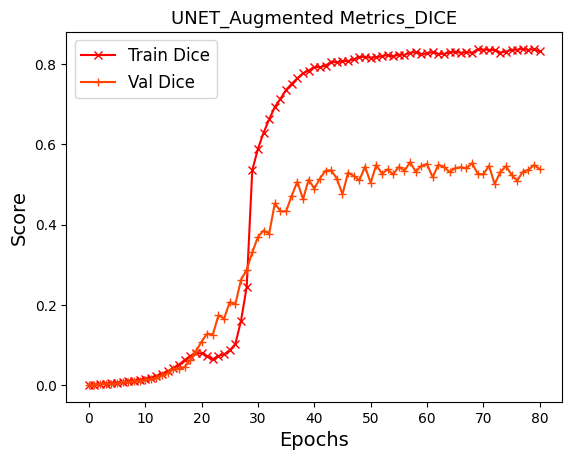

In [21]:
plot_metric(UNET_AUG,'UNET_Augmented Metrics_DICE')

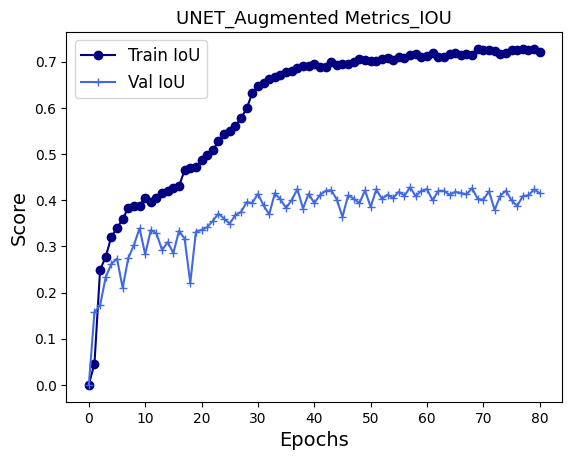

In [22]:
plot_metric(UNET_AUG,'UNET_Augmented Metrics_IOU',False)

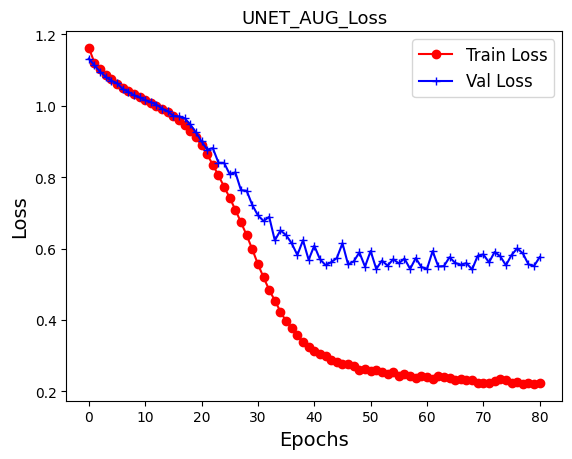

In [23]:
plot_loss(UNET_AUG,'UNET_AUG_Loss')

# Nested U-Net

In [22]:
NestUNET = pd.read_csv(csv_list[0])

In [23]:
NestUNET= rename(NestUNET)

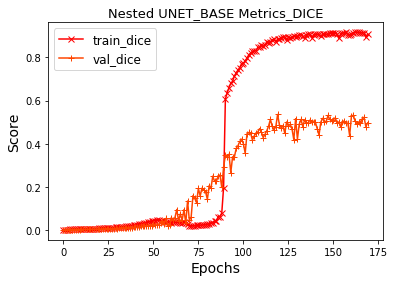

In [24]:
plot_metric(NestUNET,'Nested UNET_BASE Metrics_DICE')

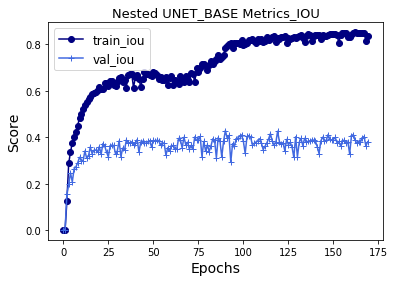

In [25]:
plot_metric(NestUNET,'Nested UNET_BASE Metrics_IOU',False)

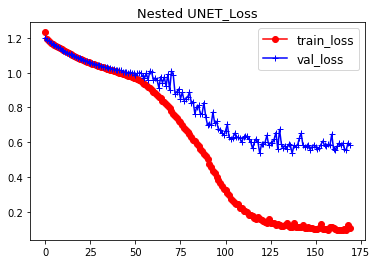

In [26]:
plot_loss(NestUNET,'Nested UNET_Loss')

In [27]:
# Nested UNet Augmented
NestUNET_aug = pd.read_csv(csv_list[3])

In [28]:
NestUNET_aug= rename(NestUNET_aug)

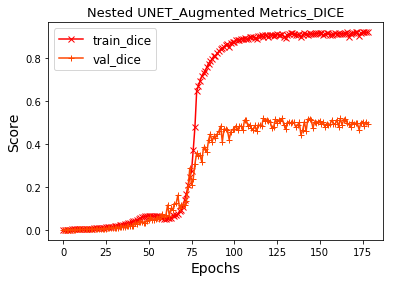

In [29]:
plot_metric(NestUNET_aug,'Nested UNET_Augmented Metrics_DICE')

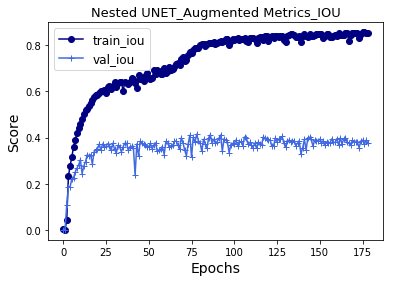

In [30]:
plot_metric(NestUNET_aug,'Nested UNET_Augmented Metrics_IOU',False)

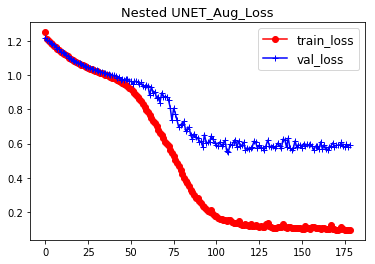

In [31]:
plot_loss(NestUNET_aug,'Nested UNET_Aug_Loss')